In [127]:
import pickle as pkl
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt
import pandas as pd
from nilearn import plotting
from scipy import stats



def ICC(ratings):
    ns, nr = ratings.shape
    SStotal = ratings.var(ddof=1) * (ns * nr - 1)
    MSr = ratings.mean(axis=1).var(ddof=1) * nr
    MSw = (ratings.var(axis=1, ddof=1) / ns).sum()
    MSc = ratings.mean(axis=0).var(ddof=1) * ns
    MSe = (SStotal - MSr * (ns - 1) - MSc * (nr - 1)) / ((ns - 1) * (nr - 1))
    return (MSr - MSe)/(MSr + (nr - 1) * MSe)


def ICC_q(ratings):
    ns, nr = ratings.shape
    SStotal = ratings.var(ddof=1) * (ns * nr - 1)
    MSr = ratings.mean(axis=1).var(ddof=1) * nr
    MSw = (ratings.var(axis=1, ddof=1) / ns).sum()
    MSc = ratings.mean(axis=0).var(ddof=1) * ns
    MSe = (SStotal - MSr * (ns - 1) - MSc * (nr - 1)) / ((ns - 1) * (nr - 1))
    return MSr, MSe



icc = []
network = []
for net in range(1,8):

    cwd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/cstc/fs/'
    plotd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/plot/'
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
    for k in ['Rep_50']:
        for i in ['fc',]:
            ref = open(cwd+'Ref'+'_'+i+'.pkl','rb')
            fs_ref=pkl.load(ref)  
            ref.close()
            rep = open(cwd+k+'_'+i+'.pkl','rb')
            fs_rep=pkl.load(rep)  
            rep.close()
            val = [ICC(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]]))) for i in range(fs_ref.shape[1])]
            #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
            #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            icc += val
            network += ['network_'+str(net)+'+sub' for i in range(len(val))]
            

In [128]:
data_cstc = pd.DataFrame({'icc':icc, 'cstc':network})

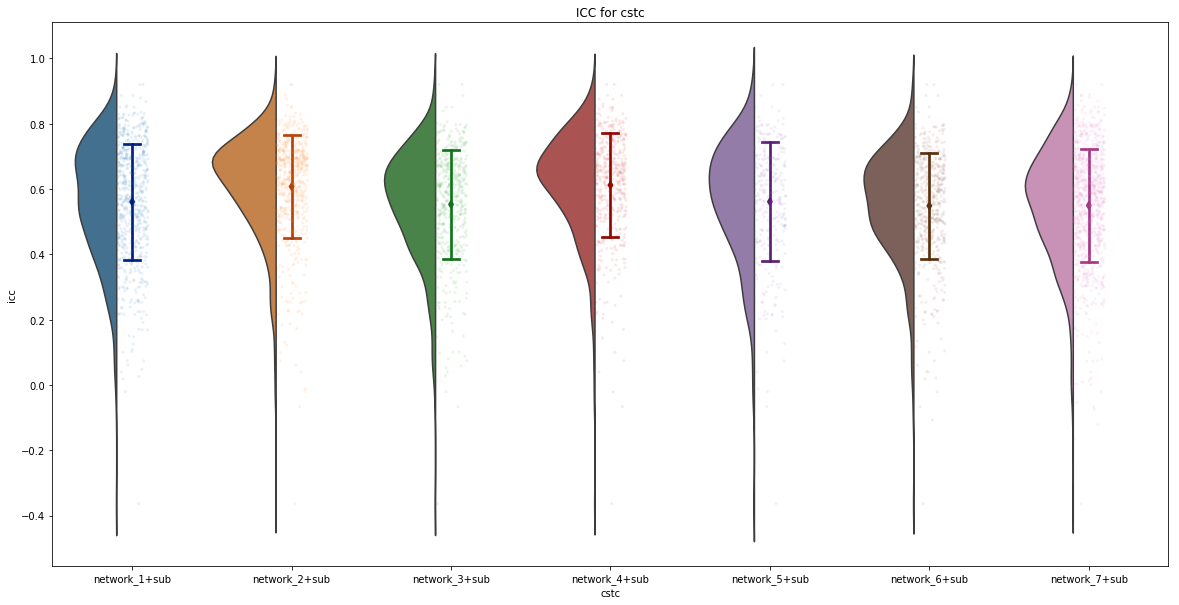

In [129]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="cstc", y="icc", data=data_cstc, dodge=0.6, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.1)
sns.stripplot(x="cstc", y="icc", data=data_cstc, size = 3, dodge=0.45, alpha = 0.1).set_title('ICC for cstc')
pt.half_violinplot(x="cstc", y="icc", data=data_cstc, scale = "area",inner = None, offset = 0.1, saturation=0.5) 
plt.savefig('ICC_for_cstc.png')

In [102]:
icc = []
network = []
for net in range(1,8):

    cwd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/net/fs/'
    
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
    for k in ['Rep_50']:
        for i in ['fc',]:
            ref = open(cwd+'Ref'+'_'+i+'.pkl','rb')
            fs_ref=pkl.load(ref)  
            ref.close()
            rep = open(cwd+k+'_'+i+'.pkl','rb')
            fs_rep=pkl.load(rep)  
            rep.close()
            val = [ICC(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]]))) for i in range(fs_ref.shape[1])]
            #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
            #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            icc += val
            network += ['network_'+str(net) for i in range(len(val))]
            

In [103]:
cwd = '/data3/cdb/ytong/Ensemble/Sub/fs/'
    
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
for k in ['Rep_50']:
    for i in ['fc',]:
        ref = open(cwd+'Ref'+'_'+i+'.pkl','rb')
        fs_ref=pkl.load(ref)  
        ref.close()
        rep = open(cwd+k+'_'+i+'.pkl','rb')
        fs_rep=pkl.load(rep)  
        rep.close()
        val = [ICC(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]]))) for i in range(fs_ref.shape[1])]
        #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
        #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
        icc += val
        network += ['Sub' for i in range(len(val))]
            

In [104]:
data_part = pd.DataFrame({'icc':icc, 'part':network})

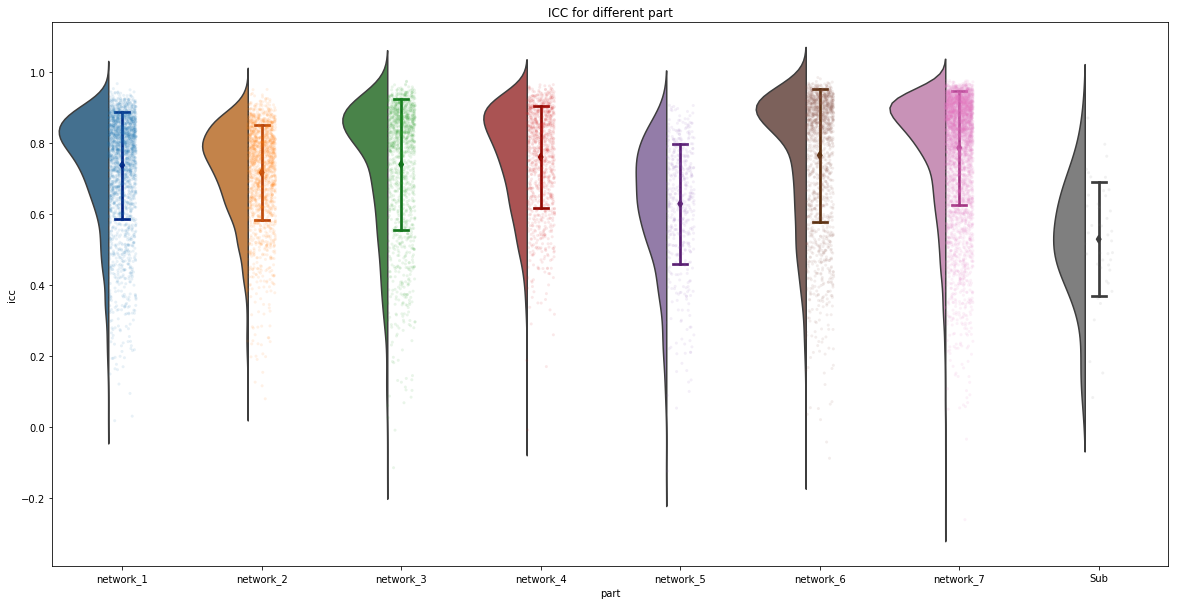

In [105]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="part", y="icc", data=data_part, dodge=0.6, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.1)
sns.stripplot(x="part", y="icc", data=data_part, size = 3, dodge=0.45, alpha = 0.1).set_title('ICC for different part')
pt.half_violinplot(x="part", y="icc", data=data_part, scale = "area",inner = None, offset = 0.1, saturation=0.5) 
plt.savefig('ICC_for_part.png')

In [106]:
icc = []
network = []
fs = []
tstat = []
pval = []
for net in range(1,8):

    cwd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/cstc/fs/'
    plotd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/plot/'
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
    for k in ['Rep_50']:
        
        val_f = []
        
        for f in ['fc','fs_5dis','fs_6dis']:
            ref = open(cwd+'Ref'+'_'+f+'.pkl','rb')
            fs_ref=pkl.load(ref)  
            ref.close()
            rep = open(cwd+k+'_'+f+'.pkl','rb')
            fs_rep=pkl.load(rep)  
            rep.close()
            val = [ICC(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]]))) for i in range(fs_ref.shape[1])]
            #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
            #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            icc += val
            network += ['network_'+str(net)+'+sub' for i in range(len(val))]
            fs += [f for i in range(len(val))]
            val_f+=val
        t1,p1 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3):int(len(val_f)/3*2)], nan_policy ='omit', equal_var=False)
        t2,p2 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3*2):], nan_policy ='omit', equal_var=False)
        tstat += [t1,t2]
        pval += [p1,p2]
            
            
            

In [107]:
data_cstc_fs = pd.DataFrame({'icc':icc, 'part':network, 'fs':fs})

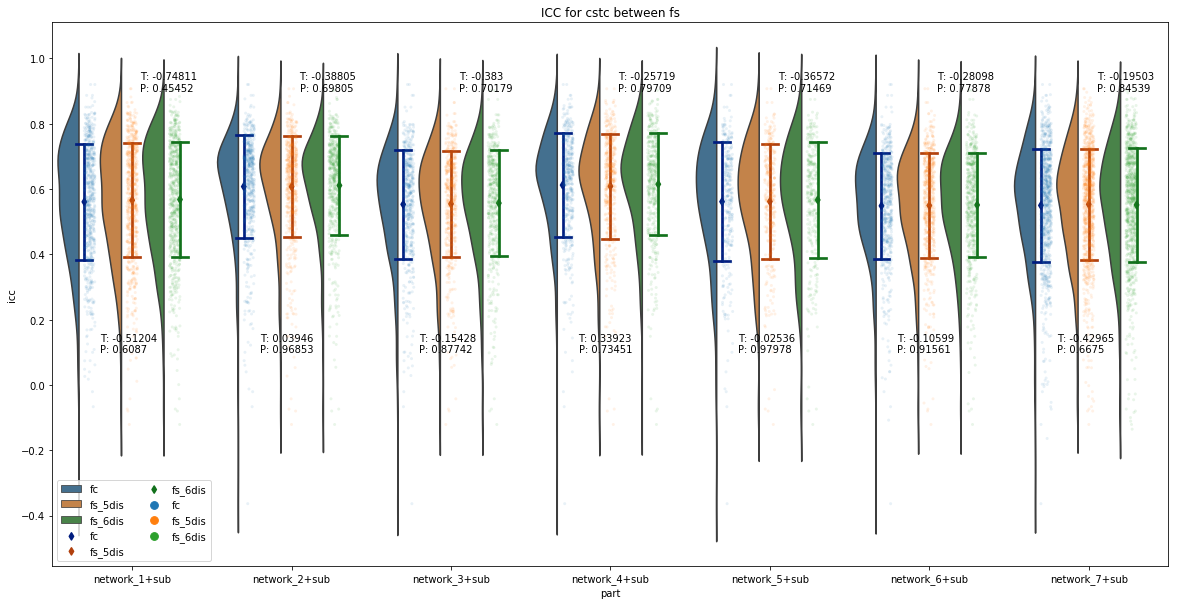

In [108]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="part", y="icc", hue='fs', data=data_cstc_fs, dodge=0.6, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.1)
sns.stripplot(x="part", y="icc", hue='fs', data=data_cstc_fs, size = 3, dodge=0.45, alpha = 0.1).set_title('ICC for cstc between fs')
pt.half_violinplot(x="part", y="icc", hue='fs', data=data_cstc_fs, scale = "area",inner = None, offset = 0.07, saturation=0.5) 
plt.text(-0.2,0.1,'T: '+str(round(tstat[0],5))+'\nP: '+str(round(pval[0],5)))
plt.text(0.05,0.9,'T: '+str(round(tstat[1],5))+'\nP: '+str(round(pval[1],5)))
plt.text(0.8,0.1,'T: '+str(round(tstat[2],5))+'\nP: '+str(round(pval[2],5)))
plt.text(1.05,0.9,'T: '+str(round(tstat[3],5))+'\nP: '+str(round(pval[3],5)))
plt.text(1.8,0.1,'T: '+str(round(tstat[4],5))+'\nP: '+str(round(pval[4],5)))
plt.text(2.05,0.9,'T: '+str(round(tstat[5],5))+'\nP: '+str(round(pval[5],5)))
plt.text(2.8,0.1,'T: '+str(round(tstat[6],5))+'\nP: '+str(round(pval[6],5)))
plt.text(3.05,0.9,'T: '+str(round(tstat[7],5))+'\nP: '+str(round(pval[7],5)))
plt.text(3.8,0.1,'T: '+str(round(tstat[8],5))+'\nP: '+str(round(pval[8],5)))
plt.text(4.05,0.9,'T: '+str(round(tstat[9],5))+'\nP: '+str(round(pval[9],5)))
plt.text(4.8,0.1,'T: '+str(round(tstat[10],5))+'\nP: '+str(round(pval[10],5)))
plt.text(5.05,0.9,'T: '+str(round(tstat[11],5))+'\nP: '+str(round(pval[11],5)))
plt.text(5.8,0.1,'T: '+str(round(tstat[12],5))+'\nP: '+str(round(pval[12],5)))
plt.text(6.05,0.9,'T: '+str(round(tstat[13],5))+'\nP: '+str(round(pval[13],5)))




#plt.savefig('ICC_for_part.png')
plt.legend(ncol=2)


plt.savefig('icc_cstc_fs.png')






In [109]:
icc = []
network = []
fs = []
tstat = []
pval = []
for net in range(1,8):

    cwd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/cstc/fs/'
    plotd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/plot/'
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
    for k in ['Rep_50']:
        
        val_f = []
        
        for f in ['fc','fs_5dis','fs_6dis']:
            ref = open(cwd+'Ref'+'_'+f+'.pkl','rb')
            fs_ref=pkl.load(ref)  
            ref.close()
            rep = open(cwd+k+'_'+f+'.pkl','rb')
            fs_rep=pkl.load(rep)  
            rep.close()
            val = [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
            #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            icc += val
            network += ['network_'+str(net)+'+sub' for i in range(len(val))]
            fs += [f for i in range(len(val))]
            val_f+=val
        t1,p1 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3):int(len(val_f)/3*2)], nan_policy ='omit', equal_var=False)
        t2,p2 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3*2):], nan_policy ='omit', equal_var=False)
        tstat += [t1,t2]
        pval += [p1,p2]
            
            

In [110]:
mse_cstc_fs = pd.DataFrame({'mse':icc, 'part':network, 'fs':fs})

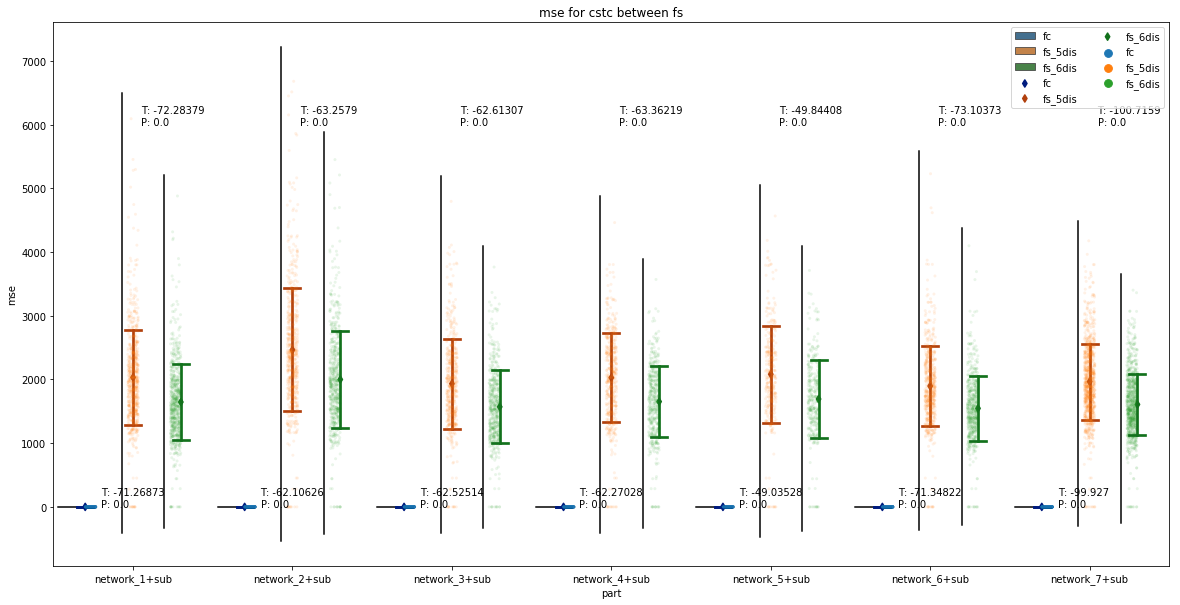

In [111]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="part", y="mse", hue='fs', data=mse_cstc_fs, dodge=0.6, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.1)
sns.stripplot(x="part", y="mse", hue='fs', data=mse_cstc_fs, size = 3, dodge=0.45, alpha = 0.1).set_title('mse for cstc between fs')
pt.half_violinplot(x="part", y="mse", hue='fs', data=mse_cstc_fs, scale = "area",inner = None, offset = 0.07, saturation=0.5) 
plt.text(-0.2,0.1,'T: '+str(round(tstat[0],5))+'\nP: '+str(round(pval[0],5)))
plt.text(0.05,6000,'T: '+str(round(tstat[1],5))+'\nP: '+str(round(pval[1],5)))
plt.text(0.8,0.1,'T: '+str(round(tstat[2],5))+'\nP: '+str(round(pval[2],5)))
plt.text(1.05,6000,'T: '+str(round(tstat[3],5))+'\nP: '+str(round(pval[3],5)))
plt.text(1.8,0.1,'T: '+str(round(tstat[4],5))+'\nP: '+str(round(pval[4],5)))
plt.text(2.05,6000,'T: '+str(round(tstat[5],5))+'\nP: '+str(round(pval[5],5)))
plt.text(2.8,0.1,'T: '+str(round(tstat[6],5))+'\nP: '+str(round(pval[6],5)))
plt.text(3.05,6000,'T: '+str(round(tstat[7],5))+'\nP: '+str(round(pval[7],5)))
plt.text(3.8,0.1,'T: '+str(round(tstat[8],5))+'\nP: '+str(round(pval[8],5)))
plt.text(4.05,6000,'T: '+str(round(tstat[9],5))+'\nP: '+str(round(pval[9],5)))
plt.text(4.8,0.1,'T: '+str(round(tstat[10],5))+'\nP: '+str(round(pval[10],5)))
plt.text(5.05,6000,'T: '+str(round(tstat[11],5))+'\nP: '+str(round(pval[11],5)))
plt.text(5.8,0.1,'T: '+str(round(tstat[12],5))+'\nP: '+str(round(pval[12],5)))
plt.text(6.05,6000,'T: '+str(round(tstat[13],5))+'\nP: '+str(round(pval[13],5)))
plt.legend(ncol = 2)
plt.savefig('mse_cstc_fs.png')


In [133]:
icc = []
network = []
fs = []
tstat = []
pval = []
for net in range(1,2):

    cwd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/cstc/fs/'
    plotd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/plot/'
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
    for k in ['Rep_50']:
        
        val_f = []
        
        for f in ['canberra','euclidean','manhattan','seuclidean','sqeuclidean']:
            ref = open(cwd+'Ref'+'_'+f+'.pkl','rb')
            fs_ref=pkl.load(ref)  
            ref.close()
            rep = open(cwd+k+'_'+f+'.pkl','rb')
            fs_rep=pkl.load(rep)  
            rep.close()
            val = [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
            #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            icc += val
            network += ['network_'+str(net)+'+sub' for i in range(len(val))]
            fs += [f for i in range(len(val))]
            val_f+=val
        t1,p1 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3):int(len(val_f)/3*2)], nan_policy ='omit', equal_var=False)
        t2,p2 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3*2):], nan_policy ='omit', equal_var=False)
        tstat += [t1,t2]
        pval += [p1,p2]
            
            

In [134]:
mse_cstc_fs = pd.DataFrame({'mse':icc, 'part':network, 'fs':fs})

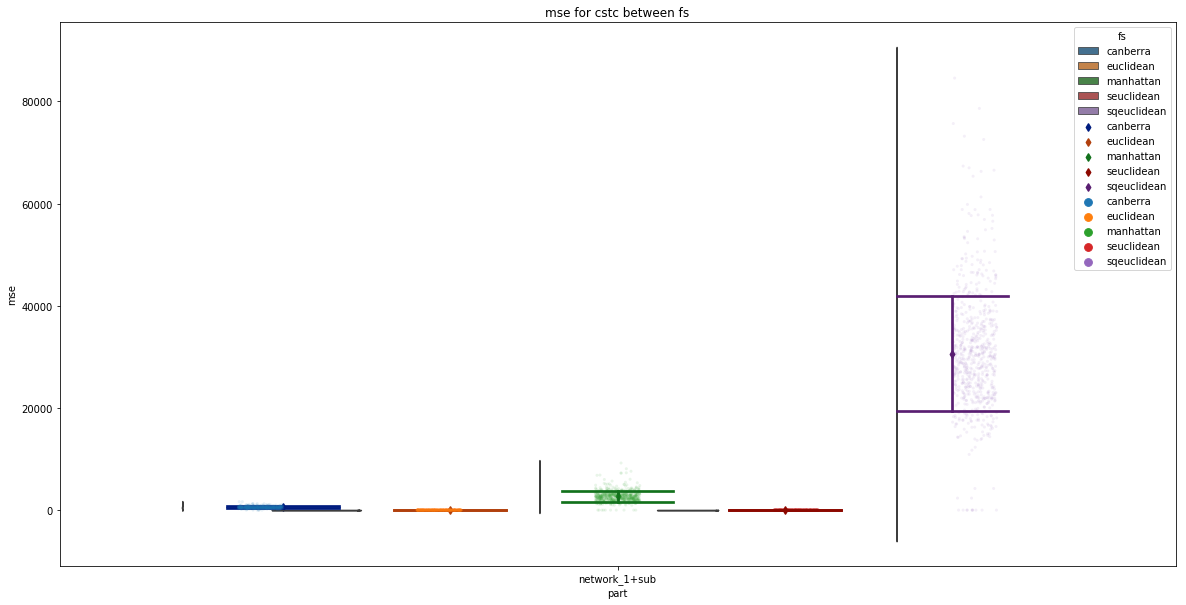

In [135]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="part", y="mse", hue='fs', data=mse_cstc_fs, dodge=0.6, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.1)
sns.stripplot(x="part", y="mse", hue='fs', data=mse_cstc_fs, size = 3, dodge=0.45, alpha = 0.1).set_title('mse for cstc between fs')
pt.half_violinplot(x="part", y="mse", hue='fs', data=mse_cstc_fs, scale = "area",inner = None, offset = 0.07, saturation=0.5)

In [112]:
icc = []
network = []
fs = []
tstat = []
pval = []
for net in range(1,8):

    cwd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/net/fs/'
    plotd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/plot/'
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
    for k in ['Rep_50']:
        
        val_f = []
        
        for f in ['fc','fs_5dis','fs_6dis']:
            ref = open(cwd+'Ref'+'_'+f+'.pkl','rb')
            fs_ref=pkl.load(ref)  
            ref.close()
            rep = open(cwd+k+'_'+f+'.pkl','rb')
            fs_rep=pkl.load(rep)  
            rep.close()
            val = [ICC(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]]))) for i in range(fs_ref.shape[1])]
            #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
            #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            icc += val
            network += ['network_'+str(net) for i in range(len(val))]
            fs += [f for i in range(len(val))]
            val_f+=val
        t1,p1 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3):int(len(val_f)/3*2)], nan_policy ='omit', equal_var=False)
        t2,p2 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3*2):], nan_policy ='omit', equal_var=False)
        tstat += [t1,t2]
        pval += [p1,p2]
            
            

In [113]:
cwd = '/data3/cdb/ytong/Ensemble/Sub/fs/'
    
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
for k in ['Rep_50']:
    
    val_f = []
    
    for f in ['fc','fs_5dis','fs_6dis']:
        ref = open(cwd+'Ref'+'_'+f+'.pkl','rb')
        fs_ref=pkl.load(ref)  
        ref.close()
        rep = open(cwd+k+'_'+f+'.pkl','rb')
        fs_rep=pkl.load(rep)  
        rep.close()
        val = [ICC(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]]))) for i in range(fs_ref.shape[1])]
        #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
        #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
        icc += val
        network += ['Sub' for i in range(len(val))]
        val_f+=val
        fs += [f for i in range(len(val))]
    t1,p1 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3):int(len(val_f)/3*2)], nan_policy ='omit', equal_var=False)
    t2,p2 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3*2):], nan_policy ='omit', equal_var=False)
    tstat += [t1,t2]
    pval += [p1,p2]        

In [114]:
data_part_fs = pd.DataFrame({'icc':icc, 'part':network, 'fs':fs})

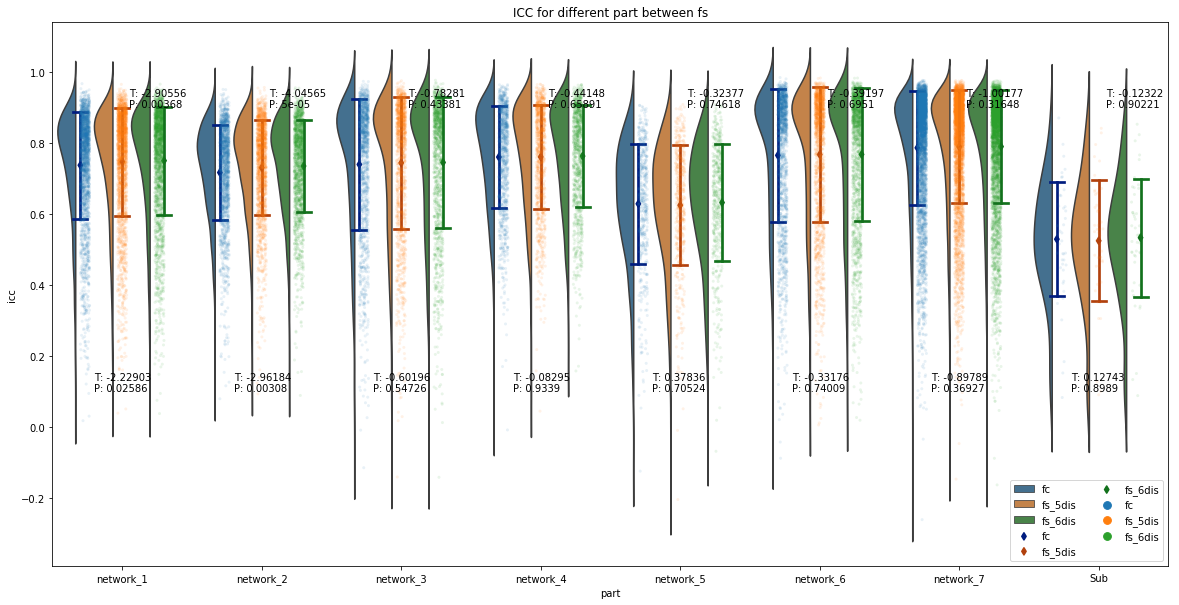

In [115]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="part", y="icc", hue='fs', data=data_part_fs, dodge=0.6, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.1)
sns.stripplot(x="part", y="icc", hue='fs', data=data_part_fs, size = 3, dodge=0.45, alpha = 0.1).set_title('ICC for different part between fs')
pt.half_violinplot(x="part", y="icc", hue='fs', data=data_part_fs, scale = "area",inner = None, offset = 0.07, saturation=0.5) 
plt.text(-0.2,0.1,'T: '+str(round(tstat[0],5))+'\nP: '+str(round(pval[0],5)))
plt.text(0.05,0.9,'T: '+str(round(tstat[1],5))+'\nP: '+str(round(pval[1],5)))
plt.text(0.8,0.1,'T: '+str(round(tstat[2],5))+'\nP: '+str(round(pval[2],5)))
plt.text(1.05,0.9,'T: '+str(round(tstat[3],5))+'\nP: '+str(round(pval[3],5)))
plt.text(1.8,0.1,'T: '+str(round(tstat[4],5))+'\nP: '+str(round(pval[4],5)))
plt.text(2.05,0.9,'T: '+str(round(tstat[5],5))+'\nP: '+str(round(pval[5],5)))
plt.text(2.8,0.1,'T: '+str(round(tstat[6],5))+'\nP: '+str(round(pval[6],5)))
plt.text(3.05,0.9,'T: '+str(round(tstat[7],5))+'\nP: '+str(round(pval[7],5)))
plt.text(3.8,0.1,'T: '+str(round(tstat[8],5))+'\nP: '+str(round(pval[8],5)))
plt.text(4.05,0.9,'T: '+str(round(tstat[9],5))+'\nP: '+str(round(pval[9],5)))
plt.text(4.8,0.1,'T: '+str(round(tstat[10],5))+'\nP: '+str(round(pval[10],5)))
plt.text(5.05,0.9,'T: '+str(round(tstat[11],5))+'\nP: '+str(round(pval[11],5)))
plt.text(5.8,0.1,'T: '+str(round(tstat[12],5))+'\nP: '+str(round(pval[12],5)))
plt.text(6.05,0.9,'T: '+str(round(tstat[13],5))+'\nP: '+str(round(pval[13],5)))
plt.text(6.8,0.1,'T: '+str(round(tstat[14],5))+'\nP: '+str(round(pval[14],5)))
plt.text(7.05,0.9,'T: '+str(round(tstat[15],5))+'\nP: '+str(round(pval[15],5)))

plt.legend(ncol=2, loc = 'lower right')


plt.savefig('icc_part_fs.png')


In [116]:
icc = []
network = []
fs = []
tstat = []
pval = []
for net in range(1,8):

    cwd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/net/fs/'
    plotd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/plot/'
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
    for k in ['Rep_50']:
        
        val_f = []
        
        for f in ['fc','fs_5dis','fs_6dis']:
            ref = open(cwd+'Ref'+'_'+f+'.pkl','rb')
            fs_ref=pkl.load(ref)  
            ref.close()
            rep = open(cwd+k+'_'+f+'.pkl','rb')
            fs_rep=pkl.load(rep)  
            rep.close()
            val = [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
            #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            icc += val
            network += ['network_'+str(net) for i in range(len(val))]
            fs += [f for i in range(len(val))]
            val_f+=val
        t1,p1 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3):int(len(val_f)/3*2)], nan_policy ='omit', equal_var=False)
        t2,p2 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3*2):], nan_policy ='omit', equal_var=False)
        tstat += [t1,t2]
        pval += [p1,p2]
            
            

In [117]:
cwd = '/data3/cdb/ytong/Ensemble/Sub/fs/'
    
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
for k in ['Rep_50']:
    
    val_f = []
    
    for f in ['fc','fs_5dis','fs_6dis']:
        ref = open(cwd+'Ref'+'_'+f+'.pkl','rb')
        fs_ref=pkl.load(ref)  
        ref.close()
        rep = open(cwd+k+'_'+f+'.pkl','rb')
        fs_rep=pkl.load(rep)  
        rep.close()
        val = [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
        #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
        #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
        icc += val
        network += ['Sub' for i in range(len(val))]
        val_f+=val
        fs += [f for i in range(len(val))]
    t1,p1 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3):int(len(val_f)/3*2)], nan_policy ='omit', equal_var=False)
    t2,p2 = stats.ttest_ind(val_f[0:int(len(val_f)/3)],val_f[int(len(val_f)/3*2):], nan_policy ='omit', equal_var=False)
    tstat += [t1,t2]
    pval += [p1,p2]        

In [118]:
mse_part_fs = pd.DataFrame({'mse':icc, 'part':network, 'fs':fs})

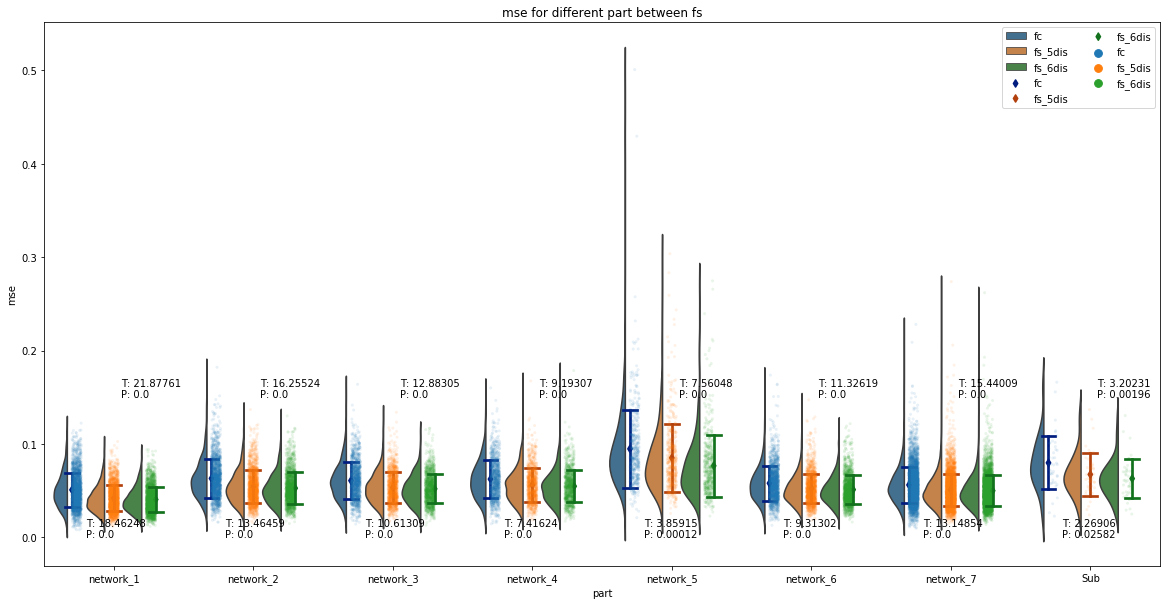

In [119]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="part", y="mse", hue='fs', data=mse_part_fs, dodge=0.6, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.1)
sns.stripplot(x="part", y="mse", hue='fs', data=mse_part_fs, size = 3, dodge=0.45, alpha = 0.1).set_title('mse for different part between fs')
pt.half_violinplot(x="part", y="mse", hue='fs', data=mse_part_fs, scale = "area",inner = None, offset = 0.07, saturation=0.5) 
plt.text(-0.2,0,'T: '+str(round(tstat[0],5))+'\nP: '+str(round(pval[0],5)))
plt.text(0.05,0.15,'T: '+str(round(tstat[1],5))+'\nP: '+str(round(pval[1],5)))
plt.text(0.8,0.0,'T: '+str(round(tstat[2],5))+'\nP: '+str(round(pval[2],5)))
plt.text(1.05,0.15,'T: '+str(round(tstat[3],5))+'\nP: '+str(round(pval[3],5)))
plt.text(1.8,0.0,'T: '+str(round(tstat[4],5))+'\nP: '+str(round(pval[4],5)))
plt.text(2.05,0.15,'T: '+str(round(tstat[5],5))+'\nP: '+str(round(pval[5],5)))
plt.text(2.8,0,'T: '+str(round(tstat[6],5))+'\nP: '+str(round(pval[6],5)))
plt.text(3.05,0.15,'T: '+str(round(tstat[7],5))+'\nP: '+str(round(pval[7],5)))
plt.text(3.8,0.,'T: '+str(round(tstat[8],5))+'\nP: '+str(round(pval[8],5)))
plt.text(4.05,0.15,'T: '+str(round(tstat[9],5))+'\nP: '+str(round(pval[9],5)))
plt.text(4.8,0.0,'T: '+str(round(tstat[10],5))+'\nP: '+str(round(pval[10],5)))
plt.text(5.05,0.15,'T: '+str(round(tstat[11],5))+'\nP: '+str(round(pval[11],5)))
plt.text(5.8,0.,'T: '+str(round(tstat[12],5))+'\nP: '+str(round(pval[12],5)))
plt.text(6.05,0.15,'T: '+str(round(tstat[13],5))+'\nP: '+str(round(pval[13],5)))
plt.text(6.8,0.0,'T: '+str(round(tstat[14],5))+'\nP: '+str(round(pval[14],5)))
plt.text(7.05,0.15,'T: '+str(round(tstat[15],5))+'\nP: '+str(round(pval[15],5)))

plt.legend(ncol=2, loc = 'upper right')


plt.savefig('mse_part_fs.png')


In [130]:
icc = []
network = []
for net in range(1,8):

    cwd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/cstc/fs/'
    plotd = '/data3/cdb/ytong/Ensemble/yeo_network'+str(net)+'/plot/'
#### Create matrix plot ####


    #icc = []
    #icc_msr = []
    #icc_mse = []
    for k in ['Rep_50']:
        for i in ['fc',]:
            ref = open(cwd+'Ref'+'_'+i+'.pkl','rb')
            fs_ref=pkl.load(ref)  
            ref.close()
            rep = open(cwd+k+'_'+i+'.pkl','rb')
            fs_rep=pkl.load(rep)  
            rep.close()
            val = [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            #icc_msr += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[0] for i in range(fs_ref.shape[1])]
            #icc_mse += [ICC_q(np.transpose(np.array([fs_ref[:, i], fs_rep[:,i]])))[1] for i in range(fs_ref.shape[1])]
            icc += val
            network += ['network_'+str(net)+'+sub' for i in range(len(val))]

In [131]:
data_cstc = pd.DataFrame({'icc':icc, 'cstc':network})

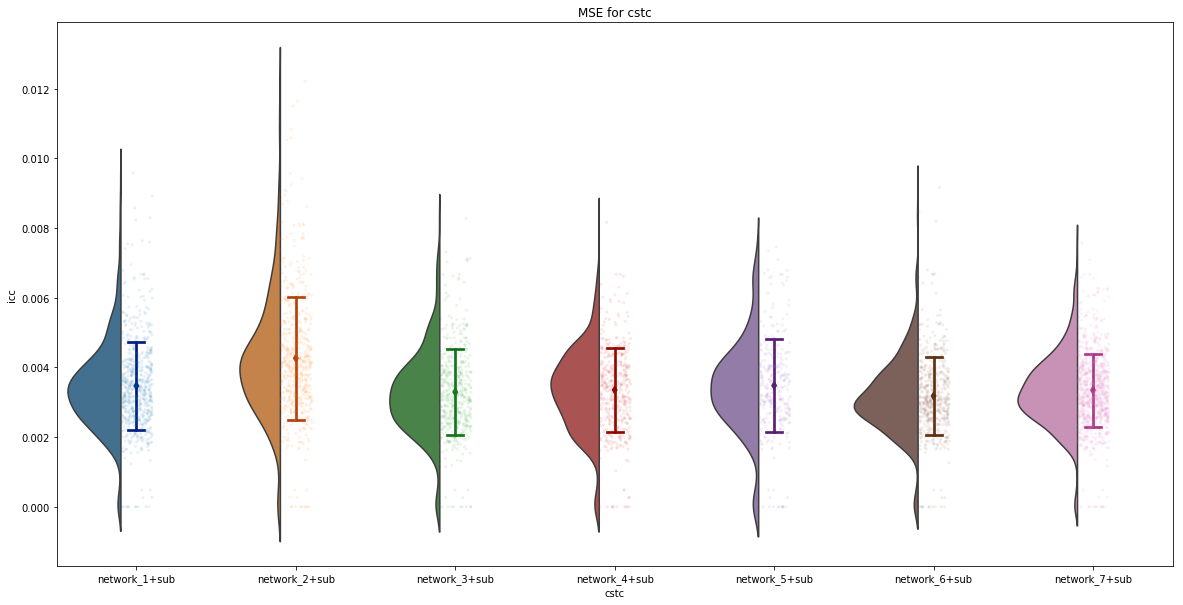

In [132]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="cstc", y="icc", data=data_cstc, dodge=0.6, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.1)
sns.stripplot(x="cstc", y="icc", data=data_cstc, size = 3, dodge=0.45, alpha = 0.1).set_title('MSE for cstc')
pt.half_violinplot(x="cstc", y="icc", data=data_cstc, scale = "area",inner = None, offset = 0.1, saturation=0.5) 
plt.savefig('mse_for_cstc.png')